In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
data=pd.read_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Nilaa\\Training Data.CSV")
test_data=pd.read_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Nilaa\\Testing Data.CSV")

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
data.duplicated().sum()

0

In [39]:
test_data.duplicated().sum()

0

In [40]:
data.drop("Loan_ID",axis=1,inplace=True)

In [41]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
data_num=data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [43]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


<AxesSubplot:>

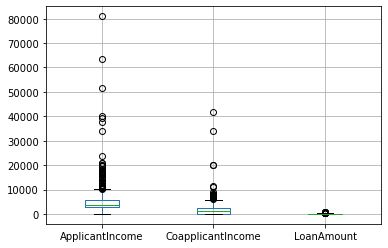

In [44]:
data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].boxplot()

In [45]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)

IQR=Q3-Q1

In [46]:
IQR

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
dtype: float64

In [47]:
(data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
609,False,False,False
610,False,False,False
611,False,False,False
612,False,False,False


In [48]:
out_rows=((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any(axis=1)

In [49]:
data=data[~out_rows]

<AxesSubplot:>

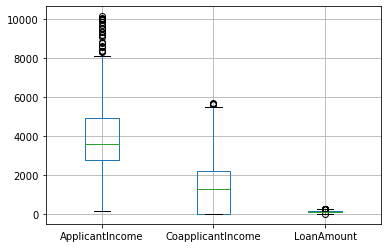

In [50]:
data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].boxplot()

In [51]:
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)
test_data["LoanAmount"].fillna(test_data["LoanAmount"].mean(),inplace=True)

In [52]:
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [53]:
test_data["Dependents"].fillna(test_data["Dependents"].mode()[0],inplace=True)
test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0],inplace=True)
test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0],inplace=True)

In [54]:
data.isna().sum()

Gender                9
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [56]:
data.dropna(how="any",inplace=True)
test_data.dropna(how="any",inplace=True)

In [57]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [58]:
dum_data=pd.get_dummies(data,columns=["Gender","Married","Education","Dependents","Self_Employed","Credit_History","Property_Area"],drop_first=True)

In [59]:
dum_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.833656,360.0,Y,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,N,1,1,0,1,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,Y,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.000000,360.0,Y,1,1,1,0,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,Y,1,0,0,0,0,0,0,1,0,1


In [60]:
test_dum_data=pd.get_dummies(test_data,columns=["Gender","Married","Education","Dependents","Self_Employed","Credit_History","Property_Area"],drop_first=True)

In [61]:
test_dum_data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1,1,0,0,0,0,0,1,0,1
1,LP001022,3076,1500,126.0,360.0,1,1,0,1,0,0,0,1,0,1
2,LP001031,5000,1800,208.0,360.0,1,1,0,0,1,0,0,1,0,1
3,LP001035,2340,2546,100.0,360.0,1,1,0,0,1,0,0,1,0,1
4,LP001051,3276,0,78.0,360.0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,4009,1777,113.0,360.0,1,1,1,0,0,1,1,1,0,1
363,LP002975,4158,709,115.0,360.0,1,1,0,0,0,0,0,1,0,1
364,LP002980,3250,1993,126.0,360.0,1,0,0,0,0,0,0,1,1,0
365,LP002986,5000,2393,158.0,360.0,1,1,0,0,0,0,0,1,0,0


In [62]:
data=dum_data.reindex(columns=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Gender_Male","Married_Yes","Education_Not Graduate","Dependents_1","Dependents_2","Dependents_3+","Self_Employed_Yes","Credit_History_1.0","Property_Area_Semiurban","Property_Area_Urban","Loan_Status"])

In [63]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,126.833656,360.0,1,0,0,0,0,0,0,1,0,1,Y
1,4583,1508.0,128.000000,360.0,1,1,0,1,0,0,0,1,0,0,N
2,3000,0.0,66.000000,360.0,1,1,0,0,0,0,1,1,0,1,Y
3,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,0,1,0,1,Y
4,6000,0.0,141.000000,360.0,1,0,0,0,0,0,0,1,0,1,Y


In [64]:
x=data.iloc[:,:14].values
y=data.iloc[:,14].values

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [66]:
model=LogisticRegression()

In [67]:
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred=model.predict(x_test)

In [69]:
accuracy_score(y_pred,y_test)

0.7961165048543689

In [72]:
df_x=data.iloc[:,:14].values
df_y=data.iloc[:,14].values

In [73]:
rfe=RFECV(estimator=LogisticRegression(),min_features_to_select=1,cv=10)

In [74]:
rfe

RFECV(cv=10, estimator=LogisticRegression())

In [76]:
x=rfe.fit_transform(df_x,df_y)

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
model_lg=LogisticRegression()

In [79]:
model_lg.fit(x_train,y_train)

LogisticRegression()

In [80]:
lg_pred=model_lg.predict(x_test)

In [81]:
accuracy_score(lg_pred,y_test)

0.8058252427184466

In [83]:
data["Gender"].value_counts

KeyError: 'Gender'

In [42]:
X_test=test_dum_data.iloc[:,1:]

In [47]:
Y_pred=model.predict(X_test)

In [48]:
test_ids=test_data["Loan_ID"]

In [51]:
df=pd.DataFrame({"Loan_ID":test_ids,"Elegible or not":Y_pred})

In [54]:
df.to_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Nilaa\\Sub2.CSV",index=False)

In [272]:
rf=RandomForestClassifier(n_estimators=500)

In [273]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [274]:
y_pred=rf.predict(x_test)

In [275]:
accuracy_score(y_pred,y_test)

0.7572815533980582

In [277]:
params={"n_estimators":[100,200,300,400,500,600,700,800,900,1000],"criterion":["gini", "entropy"]}
model=RandomForestClassifier()
cv=KFold(n_splits=10,shuffle=True)

In [278]:
gsearch = GridSearchCV(model, params,cv=cv)
results = gsearch.fit(x_train, y_train)
results.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

In [279]:
rfcl = RandomForestClassifier(criterion='entropy', n_estimators=300)
rfcl.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [280]:
y_pred=rfcl.predict(x_test)

In [281]:
accuracy_score(y_pred,y_test)

0.7572815533980582